In [1]:
import math

from utility import *
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = load_data("../data/student-renew-data.csv")
data.head()

,sex,area_type,city_level,activity_level1_class_name,leads_type,user_quality,is_age_appropriate,is_exam_before,is_schedule,is_attend,...,is_reply_introduction,is_call,is_60s_call,package_begin_days,package_begin_date,ending_time,renew_time,is_renew,ending_type,etl_time
0,女,海外,港澳台,投放,流量,3,1,0,1,1,...,1,0,0,258,2021-05-19,2022-02-19,NaN,0,实际结课,2022-02-01
1,未知,国内,其他城市,常规转介绍,转介绍后端,3,1,0,1,1,...,1,1,1,258,2021-05-19,2022-03-15,NaN,0,实际结课,2022-02-01
2,男,海外,亚洲,常规转介绍,转介绍后端,3,1,0,1,1,...,1,0,0,252,2021-09-22,2022-08-24,2022-06-17,1,实际结课,2022-06-01
3,女,国内,二类城市,常规转介绍,转介绍后端,3,1,0,1,1,...,1,1,1,90,2021-11-03,2022-04-29,NaN,0,退费结课,2022-02-01
4,男,海外,北美,常规转介绍,转介绍后端,3,1,0,1,1,...,1,0,0,14,2022-03-18,2022-05-12,NaN,0,退费结课,2022-04-01


## 一、特征分类
- 离散型数据
- 连续性数据

In [3]:
category_features = ["area_type", "city_level", "leads_type", "is_exam_before"]
numeric_features = ["prepare_rate", "one_attend_rate", "homework_rate"]
label = ["is_renew"]

In [4]:
data = data[category_features + numeric_features + label]
data.head()

,area_type,city_level,leads_type,is_exam_before,prepare_rate,one_attend_rate,homework_rate,is_renew
0,海外,港澳台,流量,0,0.548387,0.903226,0.178571,0
1,国内,其他城市,转介绍后端,0,0.096154,0.711538,0.617021,0
2,海外,亚洲,转介绍后端,0,0.942857,1.000000,1.000000,1
3,国内,二类城市,转介绍后端,0,0.636364,0.727273,0.727273,0
4,海外,北美,转介绍后端,0,0.000000,1.000000,1.000000,0


In [5]:
# 查看离散型数据的值
for _ in category_features:
    print(data[_].unique())

['海外' '国内']
['港澳台' '其他城市' '亚洲' '二类城市' '北美' '一类城市' '四类城市' '澳洲' '三类城市' '海外其他' '欧洲' '未知']
['流量' '转介绍后端' '转介绍前端' '未知' '转介绍-裂变']
[0 1]


In [6]:
# 查看连续型数据的值
data[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
prepare_rate,78438.0,0.546186,0.282682,0.0,0.322222,0.581017,0.780822,1.0
one_attend_rate,78438.0,0.840743,0.155082,0.0,0.781818,0.879310,0.947368,1.0
homework_rate,78438.0,0.605686,0.314355,0.0,0.352941,0.666667,0.892857,1.0


## 二、数据可视化

0    66754
1    11684
Name: is_renew, dtype: int64


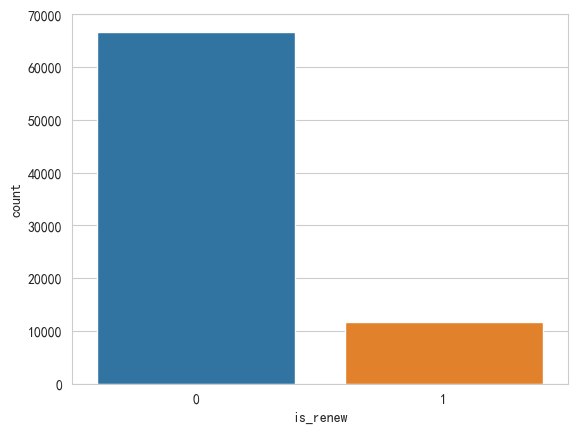

In [14]:
## 1.计数统计
sns.countplot(data, x="is_renew")
print(data["is_renew"].value_counts())

<Axes: xlabel='features', ylabel='value'>

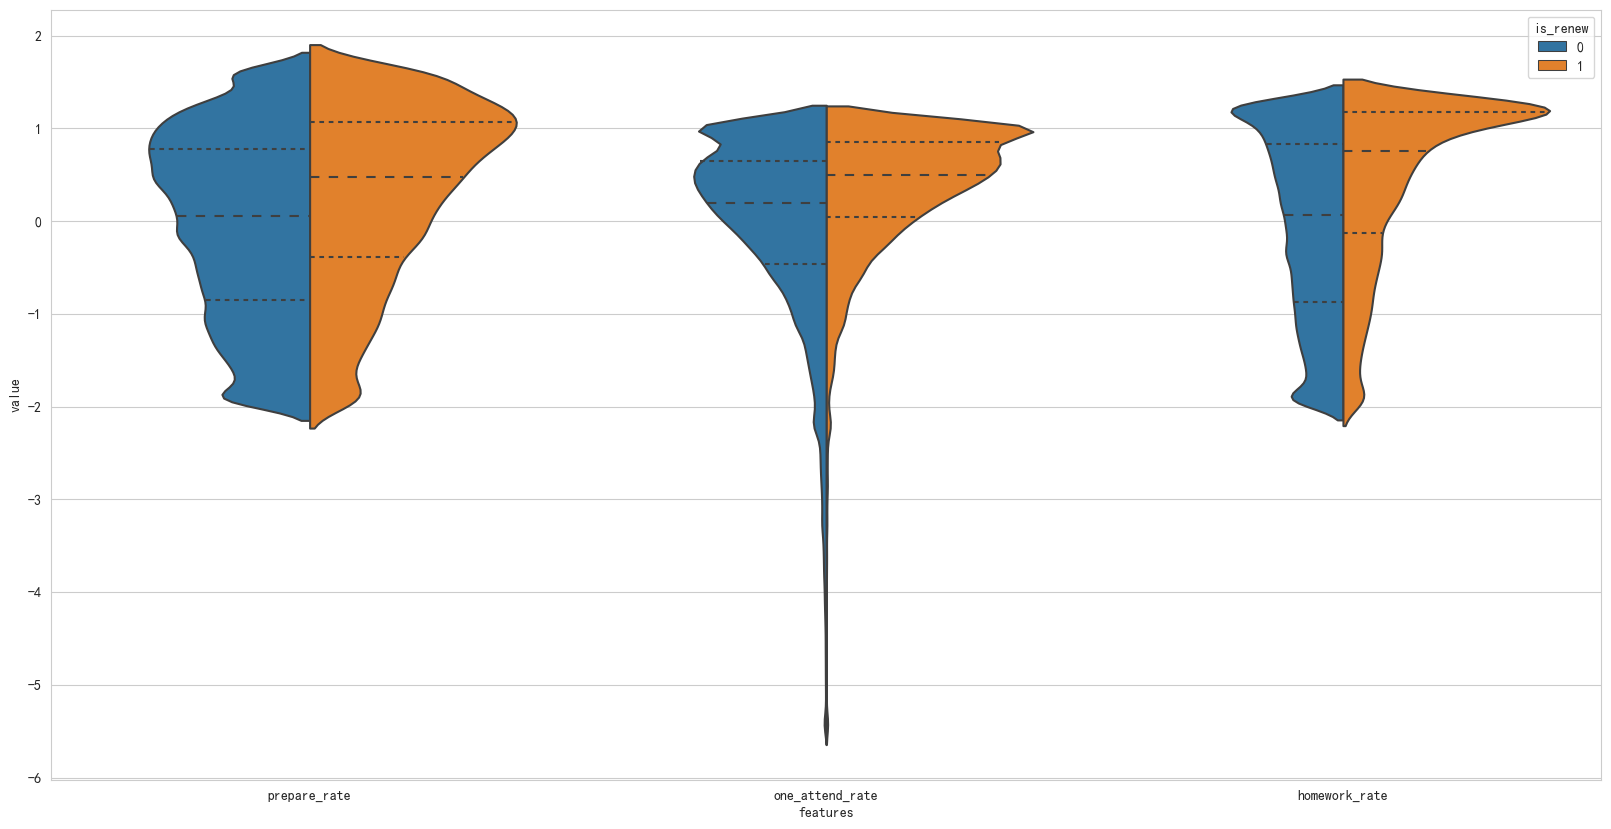

In [15]:
# 2.violin plot
# 通过查看续费和不续费情况的平均值来看这个特征能否用来做分类
data_dia = data["is_renew"]
temp_data = data[numeric_features]

data_n_2 = (temp_data - temp_data.mean()) / (temp_data.std())  # standardization
temp_data = pd.concat([data_dia,data_n_2],axis=1)
used_data = pd.melt(temp_data,id_vars="is_renew",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features",y="value",hue="is_renew",data=used_data,split=True,inner="quart")

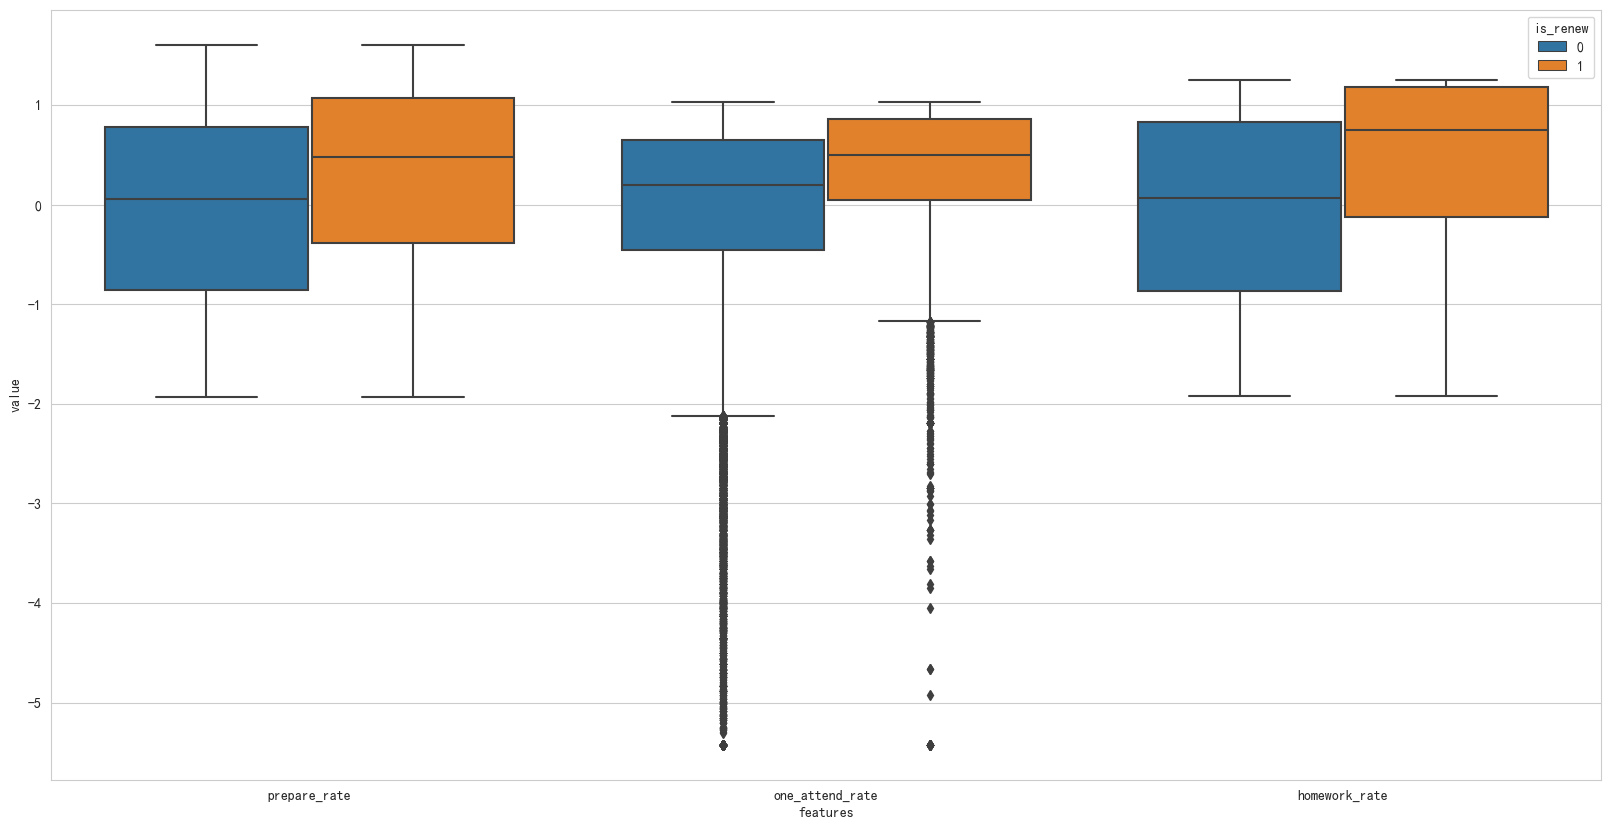

In [16]:
# 3. box plot
plt.figure(figsize=(20,10))
sns.boxplot(x="features",y="value",hue="is_renew",data=used_data)
plt.show()

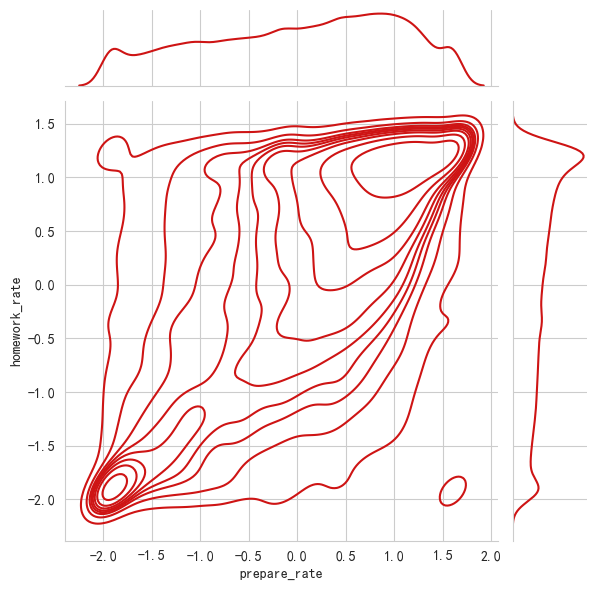

In [17]:
# 4. joint plot
sns.jointplot(x="prepare_rate",y="homework_rate",data=temp_data,kind="kde",color="#ce1414")

In [ ]:
sns.set(style="white")
g = sns.PairGrid(temp_data, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [18]:
## 5. swarm plot
sns.set(style="whitegrid", palette="muted")
data_dia = data["is_renew"]
temp_data = data[numeric_features]
data_n_2 = (temp_data - temp_data.mean()) / (temp_data.std())  # standardization
temp_data = pd.concat([data_dia,data_n_2],axis=1)
temp_data

,is_renew,prepare_rate,one_attend_rate,homework_rate
0,0,0.007788,0.402899,-1.358700
1,0,-1.592007,-0.833136,0.036060
2,1,1.403244,1.026917,1.254359
3,0,0.319009,-0.731679,0.386782
4,0,-1.932156,1.026917,1.254359
...,...,...,...,...
78433,1,-0.163383,0.045671,-0.295415
78434,1,-0.529336,-0.974244,1.254359
78435,0,0.744905,-0.134918,-0.991134
78436,1,0.426207,1.026917,-1.926756


In [21]:
used_data = pd.melt(temp_data,id_vars="is_renew",
                    var_name="features",
                    value_name='value')
# 随机取100条
used_data = used_data.sample(n=10000)
used_data

,is_renew,features,value
5960,0,prepare_rate,-0.837201
47212,0,prepare_rate,-1.174110
72189,0,prepare_rate,0.479807
78621,0,one_attend_rate,0.420029
234595,0,homework_rate,1.254359
...,...,...,...
40712,0,prepare_rate,-0.256477
43252,0,prepare_rate,0.706013
61446,0,prepare_rate,1.027831
203705,0,homework_rate,1.208915


/home/ubuntu/anaconda3/envs/py-hll-stu-predict/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda3/envs/py-hll-stu-predict/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda3/envs/py-hll-stu-predict/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 46.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda3/envs/py-hll-stu-predict/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings

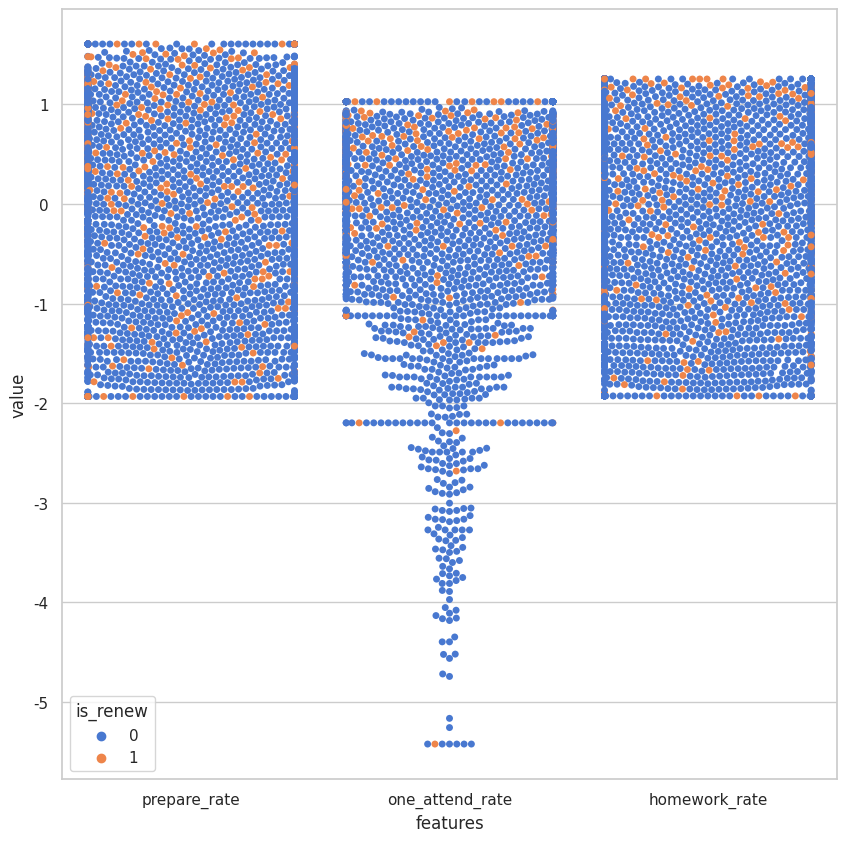

In [22]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="is_renew", data=used_data)
plt.show()